# Regression Analysis

**Regression** : Method of knowing relationship between dependent(y) and indepentent(x)

* Whenever we have asked about prediction, then by looking at the output set, we will deside wherether it is regression or classification


* If the output is countineous in nature then it should be regression analysis

**Types**
1) **Linear**: whenever the input and output has a linear nature
   1) *Linear regression* : (y = ax+b) When the input feature in just one column
   2) *Multi-Linear regression* : Whenever we have more the one input feature
   3) *Lasso Regression* :
   4) *Ridge Regression* :
2) **Non-linear** :
   1) *Polynomial Regression* :
   2) *Decision Tree Regression* :
   3) *Random Forest Regression* :
   4) *Support Vector* :
   5) *K-Nearest Neighbour* :

# Linear Regression (y = mx + c)
* Were y=mx+c is the equation of line
  * were
    * y: dependent variable
    * x: independent variable
    * c: intecept
      * c cuts above x-axis then c is +ve
      * c cuts below x-axis then c is -ve
    * m: slope
      * when m<90` then m is +ve
      * when m>906 then m is -ve
      * when m = 0 then 0
* We will draw a best prediction line with the help of given data and then we will use that line for futher predictin
* 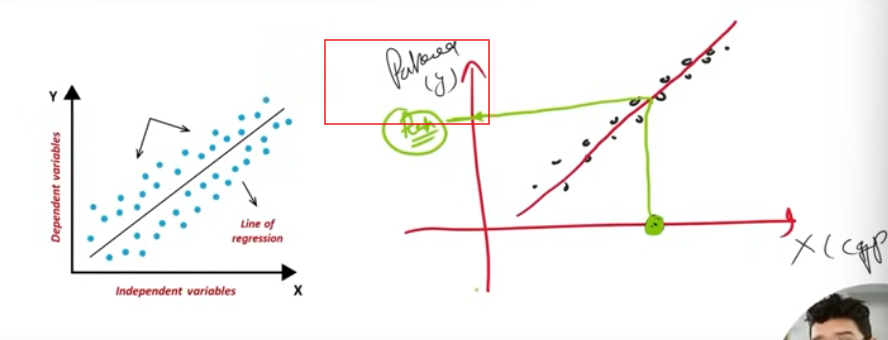
  

In [1]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("D:\Data Science\Datasets\placement.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_17700\1104693595.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\Data Science\Datasets\placement.csv")


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


* Dependent (y) = package
* Independent (x) = cgpa

In [40]:
x = data['cgpa']
y = data['package']
x.ndim, y.ndim

(1, 1)

* Note: Data should be more then 1D while using for machine learning lybraries

In [41]:
x = data[['cgpa']] #input
y = data[['package']] #output
x.ndim, y.ndim

(2, 2)

* Now check wherether x and y follows liniarity or not

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='package'>

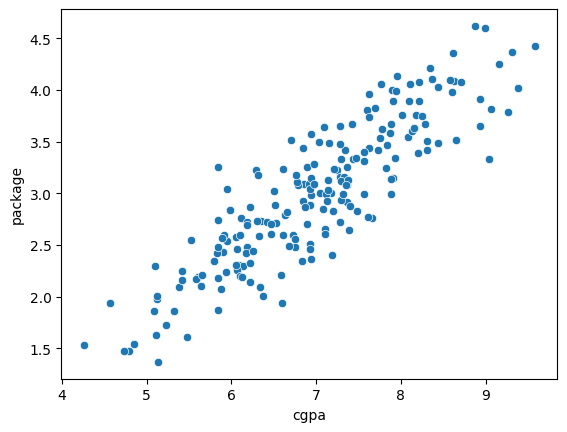

In [42]:
sns.scatterplot(x='cgpa', y='package', data=data)

* Here we can see that our graph is flowing a liniarity (not spreded)

* Now we need to do traing and testing of our data before using linear model

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
lr.predict([[6.89]])

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.94565131]])

* To know how our model is train, for that we will require accuracy score

In [59]:
lr.score(x_test, y_test)*100

75.54135737517254

* This is very poor
* So now change the value of random state

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=25)


In [102]:
lr.fit(x_train, y_train)

LinearRegression()

In [103]:
lr.score(x_test,y_test)*100

83.76622340186117

Now i will find the highest number for the array *score*

In [105]:
def high_score():
    score = []
    for i in range (0,99):
        x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=i)
        score.append(lr.score(x_test, y_test))

    max_score = max(score)
    max_index = score.index(max_score)
    return max_score, max_index
        

In [106]:
high_score()

(0.8618072045682521, 50)

* So here we got to know that the the model best performs ar seed = 85

**Mathmetics**

In [107]:
lr.coef_ #m

array([[0.56668397]])

In [109]:
lr.intercept_ #c

array([-0.96863183])

In [114]:
 print(f'y = {lr.coef_} x + {lr.intercept_}') # y = mx + c

y = [[0.56668397]] x + [-0.96863183]


**Plotting Graph**

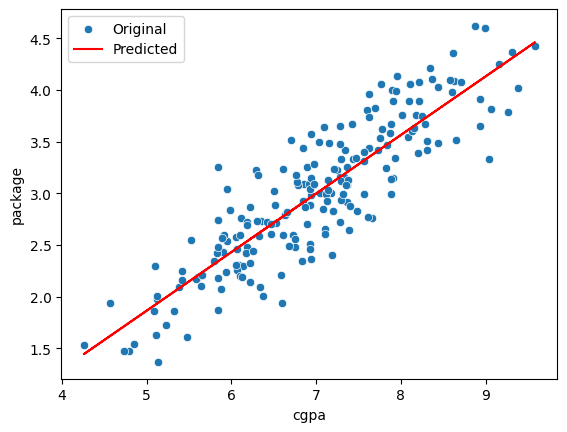

In [124]:
y_pred = lr.predict(x)
sns.scatterplot(x='cgpa', y='package', data=data, label='Original')
plt.plot(data['cgpa'], y_pred, c='red', label='Predicted')
plt.legend()

* To user we need to just give him **lr.predict(x)**
* Then he will check whatever he want
* Not we need to get the best accuracy of the model